# PCA and Recommender System

**For this project I will experiment with Principal Component Analysis as a dimensionality reduction approach to assist in clustering high-dimensional data. I will also experiment with item-based recommendation for a joke recommender system.**

### 1) PCA for Reduced Dimensionality in Clustering

**a) Load in the image data matrix (with rows as images and columns as features). Also load in the numeric class labels from the segmentation class file. Using your favorite method (e.g., sklearn's min-max scaler), perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range.**

In [258]:
import pandas as pd
import numpy as np
img_data = np.genfromtxt('segmentation_data.txt',delimiter=',',dtype=float) # image x features
classes = np.genfromtxt('segmentation_classes.txt',delimiter='\t',dtype=int,usecols=1) # numeric class labels
img_data_name = np.genfromtxt('segmentation_names.txt',dtype=str)

**Min-max normalization**

In [259]:
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
img_data = normalizer.fit_transform(img_data)
print(img_data[0:5])

[[4.30830040e-01 7.41666667e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.42205474e-02 6.72233922e-04 2.73291926e-02
  8.55743510e-04 9.01110284e-02 7.94165331e-02 6.11192912e-02
  1.30943107e-01 7.31343290e-01 1.41176540e-02 8.72865267e-01
  1.23711348e-01 5.08138840e-01 8.31849232e-01]
 [3.35968379e-01 7.33333333e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.80228046e-02 7.26095734e-04 3.22981359e-02
  5.41219947e-04 9.57913810e-02 8.50891441e-02 6.84830672e-02
  1.34840205e-01 7.29477615e-01 2.35294199e-02 8.59582565e-01
  1.27393216e-01 4.63329080e-01 8.36986460e-01]
 [8.85375494e-01 9.70833333e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.15969577e-01 2.21344355e-03 6.70807367e-02
  1.09658970e-03 8.54634659e-02 7.53646732e-02 6.18556741e-02
  1.20031165e-01 7.36940304e-01 3.88235327e-02 8.27324481e-01
  1.13402054e-01 4.80149030e-01 8.44782328e-01]
 [1.81818182e-01 9.20833333e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.37262383e-02 1.26509804e-03 2.2

**b) Using the Kmeans implementation in scikit-learn, perform clustering on the image data (use K = 7 in your clustering so that later we can compare the clusters to the 7 pre-assigned image classes). Print the cluster centroids (use some formatting so that they are visually understandable). To evaluate your clusters, first perform Silhouette analysis on the clusters (compute Silhouette values for all instances in the data, and then compute the overall mean Silhouette value; optionally, you can provide a visaulization of the Silhouettes). Next, compare your 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters.**

In [260]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, max_iter=100, verbose=0) # initialization
kmeans.fit(img_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [261]:
print("Centroids")
print(kmeans.cluster_centers_)
clusters = kmeans.predict(img_data)

Centroids
[[3.02505527e-01 5.30861582e-01 0.00000000e+00 5.22598854e-02
  4.66101695e-02 1.00816850e-01 9.42021613e-03 8.39719910e-02
  1.10432753e-02 4.00608091e-01 3.70347226e-01 4.72460748e-01
  3.53035779e-01 4.97146165e-01 5.70882355e-01 2.13054402e-01
  4.72460748e-01 3.02263027e-01 1.63879166e-01]
 [5.35098814e-01 1.50166667e-01 0.00000000e+00 2.77777769e-02
  1.66666667e-03 3.02281387e-02 5.42887957e-04 2.67660451e-02
  5.86661900e-04 8.23246433e-01 7.79716377e-01 8.94170356e-01
  7.88760696e-01 2.70665440e-01 6.66372551e-01 2.89386481e-01
  8.94170356e-01 2.11804171e-01 1.25065773e-01]
 [7.70674487e-01 4.25215054e-01 0.00000000e+00 1.39784942e-02
  2.25806452e-02 4.02367241e-02 2.98876460e-03 2.31216176e-02
  2.08839801e-03 4.11384036e-02 3.50054899e-02 5.83400636e-02
  2.87657450e-02 7.78472560e-01 2.23939283e-01 4.86509166e-01
  5.92949782e-02 5.38180806e-01 2.43969044e-01]
 [2.54169148e-01 4.59974315e-01 0.00000000e+00 2.62557070e-02
  1.36986301e-02 3.72740781e-02 2.363731

In [262]:
from sklearn import metrics

**Silhouette values for all instances in the data**

In [263]:
silhouettes = metrics.silhouette_samples(img_data, clusters)
print(silhouettes[:20])

[0.57202831 0.56064636 0.46584172 0.49522097 0.57151852 0.56037254
 0.54213796 0.41254281 0.51968142 0.46733032 0.48661677 0.49108474
 0.58463969 0.56222519 0.37949564 0.53083575 0.54919193 0.42227935
 0.41618572 0.40389039]


**Overall Mean Silhouette values**

In [264]:
print("\n Mean Silhoouette Value: ", silhouettes.mean())


 Mean Silhoouette Value:  0.33206647528635963


**A visaulization of the Silhouettes**

In [265]:
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

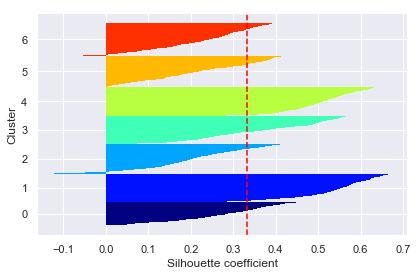

In [266]:
plot_silhouettes(img_data, clusters)

**The Completeness and Homogeneity values of the generated clusters**

In [267]:
from sklearn.metrics import completeness_score, homogeneity_score

print("completeness_score:", completeness_score(classes,clusters))
print("homogeneity_score:", homogeneity_score(classes,clusters))

completeness_score: 0.6131870124853012
homogeneity_score: 0.6115021163370863


**Cluster in heat map**

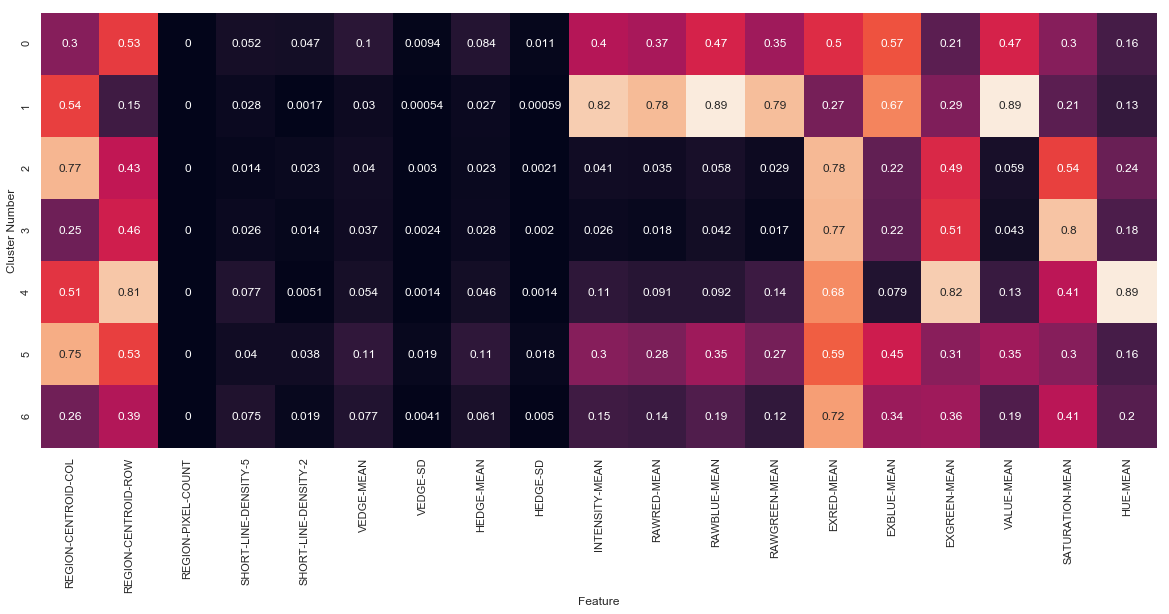

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
centers = pd.DataFrame(kmeans.cluster_centers_)
centers.columns = img_data_name
plt.figure(figsize=(20, 8))
ax = sns.heatmap(centers,cbar=False,annot=True)
ax.set(xlabel='Feature', ylabel='Cluster Number')
plt.show()

**c) Perform PCA on the normalized image data matrix. You may use the linear algebra package in Numpy or the Decomposition module in scikit-learn (the latter is much more efficient). Analyze the principal components to determine the number, r, of PCs needed to capture at least 95% of variance in the data. Provide a plot of PC variances. Then use these r components as features to transform the data into a reduced dimension space.**

In [269]:
from sklearn import decomposition
pca = decomposition.PCA()
DTtrans = pca.fit(img_data)

In [270]:
print(pca.explained_variance_ratio_)

[6.07142340e-01 1.31969792e-01 1.01237729e-01 4.54353920e-02
 3.54736114e-02 1.98803550e-02 1.89197030e-02 1.61540880e-02
 1.06560085e-02 7.11337518e-03 3.92203525e-03 1.57500309e-03
 4.89150725e-04 3.14164135e-05 2.36381041e-16 1.58615946e-16
 1.52966845e-16 1.44466875e-16 4.72275886e-35]


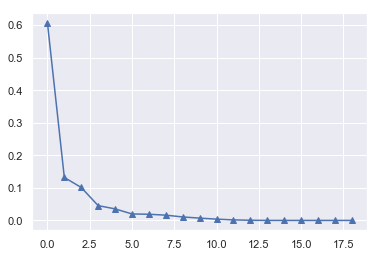

In [271]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, marker='^')

In [272]:
i = 0
for i in range(1,len(pca.explained_variance_ratio_)):
    print(i,sum(pca.explained_variance_ratio_[0:i]))

1 0.6071423396853332
2 0.7391121320168929
3 0.8403498614256191
4 0.8857852534332584
5 0.9212588648109569
6 0.9411392197960624
7 0.9600589227704959
8 0.9762130108194518
9 0.9868690193362033
10 0.9939823945149534
11 0.9979044297671412
12 0.9994794328616069
13 0.9999685835864897
14 0.9999999999999994
15 0.9999999999999997
16 0.9999999999999998
17 0.9999999999999999
18 1.0


**Looking at the above, it can be obsereved that the first 7 components capture 96% of the variance in the data.**

**Perform Kmeans on PCA data**

In [273]:
pca = decomposition.PCA(n_components=7)
DTtrans = pca.fit(img_data).transform(img_data)

kmeans.fit(DTtrans)
kmeans.cluster_centers_

array([[-0.51157863, -0.06490837, -0.33614472, -0.06536523,  0.07880903,
         0.00623993, -0.02626065],
       [ 0.43688959, -0.1049359 ,  0.16495108,  0.23437871, -0.04615874,
        -0.00751193,  0.01525282],
       [ 1.41452711,  0.0872227 ,  0.03676534, -0.17319537, -0.02992247,
        -0.00897281, -0.02157291],
       [-0.61926803,  0.64024955,  0.1958285 , -0.08685588, -0.06775977,
         0.00886611,  0.03837202],
       [-0.20622861, -0.24620484,  0.15278454,  0.05652182,  0.13058528,
        -0.00554001,  0.03284937],
       [-0.60370483, -0.35550285,  0.10919651, -0.12979947, -0.1309111 ,
        -0.02160283, -0.04388193],
       [ 0.17640392,  0.04369841, -0.26537004,  0.18412442,  0.02707514,
         0.02434118,  0.00326357]])

In [274]:
clusterPca = kmeans.predict(DTtrans)
print("Completeness Score:", completeness_score(classes,clusterPca))
print("Homogeneity Score:", homogeneity_score(classes,clusterPca))

Completeness Score: 0.6107955063694607
Homogeneity Score: 0.6091364049733291


7


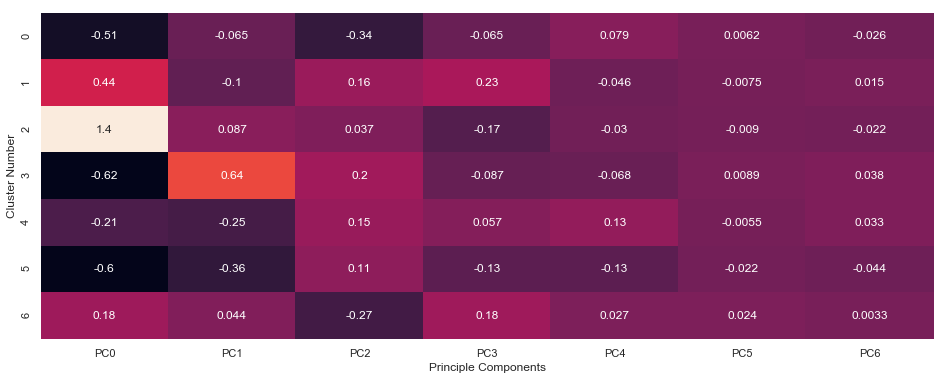

In [275]:
sns.set()
centers = pd.DataFrame(kmeans.cluster_centers_)
print(len(centers.columns))
pc_no = range(len(centers.columns))
centers.columns = ["PC" + str(i) for i in pc_no]

plt.figure(figsize=(16, 6))
ax = sns.heatmap(centers,cbar=False,annot=True)
ax.set(xlabel='Principle Components', ylabel='Cluster Number')
plt.show()

**d) Perform Kmeans again, but this time on the lower dimensional transformed data. Then compare Silhouette values as well as completeness and Homogeneity values of the new clusters. Compare these results with those obtained on the full data in part b.**

In [276]:
kmeans2 = KMeans(n_clusters=7, random_state=33) # initialization
kmeans2.fit(DTtrans)
cluster2 = kmeans2.predict(DTtrans)

In [277]:
print("Centroids")
print(kmeans2.cluster_centers_)

Centroids
[[-0.51157863 -0.06490837 -0.33614472 -0.06536523  0.07880903  0.00623993
  -0.02626065]
 [ 1.41452711  0.0872227   0.03676534 -0.17319537 -0.02992247 -0.00897281
  -0.02157291]
 [-0.20622861 -0.24620484  0.15278454  0.05652182  0.13058528 -0.00554001
   0.03284937]
 [-0.61926803  0.64024955  0.1958285  -0.08685588 -0.06775977  0.00886611
   0.03837202]
 [ 0.17640392  0.04369841 -0.26537004  0.18412442  0.02707514  0.02434118
   0.00326357]
 [-0.60370483 -0.35550285  0.10919651 -0.12979947 -0.1309111  -0.02160283
  -0.04388193]
 [ 0.43688959 -0.1049359   0.16495108  0.23437871 -0.04615874 -0.00751193
   0.01525282]]


In [278]:
# part b
silhouettes = metrics.silhouette_samples(img_data, clusters)
print(silhouettes[:20])

[0.57202831 0.56064636 0.46584172 0.49522097 0.57151852 0.56037254
 0.54213796 0.41254281 0.51968142 0.46733032 0.48661677 0.49108474
 0.58463969 0.56222519 0.37949564 0.53083575 0.54919193 0.42227935
 0.41618572 0.40389039]


In [279]:
# part d
silhouettes2 = metrics.silhouette_samples(DTtrans, cluster2)
print(silhouettes2[:20])

[0.58684873 0.57358868 0.4828261  0.51329382 0.58886224 0.57866483
 0.55967332 0.43306755 0.53630692 0.47650182 0.49764237 0.50981289
 0.5945312  0.57491994 0.3961149  0.54232467 0.55987684 0.43026789
 0.42111745 0.43411183]


**Comparison of the results from part(b)**

In [280]:
print("                      ""Original Cluster" '      ' "New Cluster")
print("completeness_score:", completeness_score(classes,clusters), completeness_score(classes,cluster2))
print("homogeneity_score: ", homogeneity_score(classes,clusters), homogeneity_score(classes,cluster2))
print("Mean Silhoouette : ", silhouettes.mean(), silhouettes2.mean())

                      Original Cluster      New Cluster
completeness_score: 0.6131870124853012 0.6107955063694608
homogeneity_score:  0.6115021163370863 0.6091364049733291
Mean Silhoouette :  0.33206647528635963 0.3598202981350322


**Discussion and Comparison:**

The scores were not significantly different but the PC dataset had lesser features while being able to explain over 95 perent of the variation. By visualizing the cluster centroids on a heatmap on the original data, some features are not used (zeros) or are not much spead out between the clusters. For the PC data, the centers does not include zeros and more spread out.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The Mean Silhoouette in both datasets provide close value between 0.33 - 0. 36, but the PC data produces a little bit greater number in this case, where a higher value possibly indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

### 2) Item-Based Joke Recommendation

**a) Load in the joke ratings data and the joke text data into appropriate data structures. Use the "recommend" function to provide top 5 joke recommendations for at least 2 users. Use both standard item-based collaborative filtering (based on the rating prediction function "standEst") and the SVD-based version of the item-based CF (using "svdEst" as the prediction engine) to generate these recommendations for the two users and note the differences. You should show the text of the recommended jokes as well as the predicted ratings for each.**

In [281]:
import itemBasedRec
jokes = np.genfromtxt("jokes.csv",delimiter=',',dtype=str)
jester = np.genfromtxt("modified_jester_data.csv", delimiter=",")
jokes = np.mat(jokes)
jester = np.mat(jester)

**User#40 with prediction function "standEst"**

In [282]:
recommend40_std = itemBasedRec.recommend(jester, 40, N=5, 
                                          simMeas=itemBasedRec.pearsonSim, estMethod=itemBasedRec.standEst)

In [283]:
i = 0
for i in range(len(recommend40_std)):
    index = recommend40_std[i][0]
    ratings = recommend40_std[i][1]
    print("Joke ID: ", index)
    print("Ratings: ", ratings)
    print(jokes[index,1])
    print('\n')    

Joke ID:  99
Ratings:  10.68362477261802
Q: What's the difference between greeting a Queen and greeting thePresident of the United  States?A: You only have to get on one knee to greet the queen.


Joke ID:  71
Ratings:  10.647477058892179
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"


Joke ID:  97
Ratings:  10.635463110215928
Age and Womanhood1. Between the ages of 13 and 18 ... She is like Africa virgin and unexplored. 2. Between the ages of 19 and 35 ... She is like Asia hot and exotic. 3. Between the ages of 36 and 4

**User#40 with prediction function "svdEst"**

In [284]:
recommend40_svd = itemBasedRec.recommend(jester, 40, N=5, 
                                          simMeas=itemBasedRec.pearsonSim, estMethod=itemBasedRec.svdEst)

In [285]:
i = 0
for i in range(len(recommend40_svd)):
    index = recommend40_svd[i][0]
    ratings = recommend40_svd[i][1]
    print("Joke ID: ", index)
    print("Ratings: ", ratings)
    print(jokes[index,1])
    print('\n')

Joke ID:  71
Ratings:  10.463658348451709
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"


Joke ID:  79
Ratings:  10.36038765615177
Hillary Bill Clinton and the Pope are sitting together on an airplane. Bill says "I could throw one thousand dollar bill out of this plane and make one person very happy."Hillary says "I could throw 10 hundred dollar bills out of the plane and make 10 people very happy."The Pope chips in and says "I could throw Bill out of the airplane and make the whole country happy."


Joke ID:  77
Ratings

**User#45 with prediction function "standEst"**

In [286]:
# User 45
recommend45_std = itemBasedRec.recommend(jester, 45, N=5, 
                                          simMeas=itemBasedRec.pearsonSim, estMethod=itemBasedRec.standEst)

In [287]:
i = 0
for i in range(len(recommend45_std)):
    index = recommend45_std[i][0]
    ratings = recommend45_std[i][1]
    print("Joke ID: ", index)
    print("Ratings: ", ratings)
    print(jokes[index,1])
    print('\n')

Joke ID:  71
Ratings:  11.161233866346754
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"


Joke ID:  75
Ratings:  11.133472751004833
There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should celebrate. I have   a  bottle of wine in my car let's open it.' So the woman got the bottle out of the car and  handed it to the man. The man took a really big 

**User#45 with prediction function "svddEst"**

In [288]:
recommend45_svd = itemBasedRec.recommend(jester, 45, N=5, 
                                          simMeas=itemBasedRec.pearsonSim, estMethod=itemBasedRec.svdEst)

In [289]:
i = 0
for i in range(len(recommend45_svd)):
    index = recommend45_svd[i][0]
    ratings = recommend45_svd[i][1]
    print("Joke ID: ", index)
    print("Ratings: ", ratings)
    print(jokes[index,1])
    print('\n')

Joke ID:  70
Ratings:  11.2632878174211
At a recent Sacramento PC Users Group meeting a company was demonstrating its latest speech-recognition software.   A representative from the company was just about ready to start the demonstration and asked everyone in the room to quiet down.Just then someone in the back of the room yelled"Format C: Return."Someone else chimed in:"Yes Return"Unfortunately the software worked.


Joke ID:  71
Ratings:  11.256903374629912
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"


Joke ID:  77
R

**b) Complete the definition for the function "test". This function iterates over all users and for each performs evaluation (by calling the provided "cross_validate_user" function), and returns the error information necessary to compute Mean Absolute Error (MAE). Use this function to perform evaluation (with 20% test-ratio for each user) comparing MAE results using the rating prediction function "standEst" with results using the "svdEst" prediction function.**

**[Note: See comments provided in the module for hints on accomplishing these tasks.]**

In [290]:
import itemBasedRec as ibr
# reload(itemBasedRec)

def test(dataMat, test_ratio, estMethod):
    
    MAE = 0
    error = 0
    count = 0
    for user in range (len(dataMat)):
        error_u, count_u = ibr.cross_validate_user(dataMat, user, test_ratio,estMethod)
        error += error_u
        count += count_u
        MAE = error/count    
    
    print('Mean Absoloute Error for ',estMethod.__name__,' : ', MAE)

test(jester,0.2,ibr.svdEst)
test(jester,0.2,ibr.standEst)

Mean Absoloute Error for  svdEst  :  3.6645810331211175
Mean Absoloute Error for  standEst  :  3.718721022394743


**c) Write a new function "print_most_similar_jokes" which takes the joke ratings data, a query joke id, a parameter k for the number similar jokes, and a similarity metric function, and prints the text of the query joke as well as the texts of the top k most similar jokes based on user ratings.** 

**[Note: For hints on how to accomplish this task, please see comments at the end of the provided module as well as comments for the provided stub function.]**

In [291]:
def print_most_similar_jokes(data, jokes, queryJoke, k, metric=ibr.pearsonSim):
# Write this function to find the k most similar jokes (based on user ratings) to a queryJoke
# The queryJoke is a joke id as given in the 'jokes.csv' file (an corresponding to the a column in dataMat)
# You must compare ratings for the queryJoke (the column in dataMat corresponding to the joke), to all
# other joke rating vectors and return the top k. Note that this is the same as performing KNN on the 
# columns of dataMat. The function must retrieve the text of the joke from 'jokes.csv' file and print both
# the queryJoke text as well as the text of the returned jokes.
    joke_rating = data.T
    q_joke = joke_rating[queryJoke]
    
    similarity = []
  
    for i in range(joke_rating.shape[0]):
        metric(joke_rating[i],q_joke)
        if i==queryJoke: #set similarity of same joke to 0
            similarity.append(0)
        else:
            similarity.append(metric(joke_rating[i],q_joke))

    # possible to use dict{}
    sim = pd.DataFrame({'similarity' :similarity})

    rec_joke_index = sim.sort_values(by='similarity',ascending=False).iloc[0:k].index.values
    print("Selected joke: \n",jokes[queryJoke,1])
    print("\nTop",k,"Recommended jokes are :")
    for i in rec_joke_index:
        print(jokes[i,1],"\n_______________")
    

print_most_similar_jokes(jester, jokes, 3, 5, ibr.pearsonSim)

Selected joke: 
 Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.

Top 5 Recommended jokes are :
A man visits the doctor. The doctor says "I have bad news for you.You have cancer and Alzheimer's disease". The man replies "Well thank God I don't have cancer!" 
_______________
What is the rallying cry of the International Dyslexic Pride movement? Dyslexics Untie! 
_______________
Q: How many stalkers does it take to change a light bulb?A: Two. One to replace the bulb and the other to watch it day and night. 
_______________
Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference. 
_______________
On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. 

**d) Develop your own item-based collaborative filtering recommender that uses a model-based approach (separating the training and the prediction tasks). In the training component, item-item similarities for all pairs of items are computed and stored in an appropriate data structure. Your training function should be able to use different similarity functions (passed as a parameter) including Cosine Similarity or Pearson Correlation. The prediction (or estimation) function should take as parameters a target user, an item, a value of k, and the similarities data structure and return the predicted rating on the target item for the target user. The predicted rating should be based on the weighted average of the target user's ratings on k most similar items to the target item. You should test the prediction accuracy of your estimation function (using a cross-validation similar to part b, above) and provide a plot of cross-validation accuracies across a range of values of k. Using the best value of k, demonstrate the functionality of your recommender by generating recommendations for several anecdotal users (similar to part a, above).**

In [292]:
import itemBasedRec as ibr
import pandas as pd
import numpy as np

jokes = pd.read_csv("jokes.csv", header=None, index_col=0)
jester = pd.read_csv("modified_jester_data.csv", header=None)

In [293]:
def itemB_training(dataMat, simFunc = ibr.pearsonSim):
    dataMat = np.array(dataMat.T)
    size = dataMat.shape[0]
    similarity_arr = {}   
    for i in range(size):
        similarities = []
        for j in range(size):
            if i == j: continue
            #similarity item to item
            similarity = simFunc(dataMat[i], dataMat[j])
            similarities.append((j, similarity)) 
            similarity_arr[i] = similarities 
    return similarity_arr

In [294]:
def itemB_test(dataMat, tarUser, tarItem, k, simMatrix):
    size = dataMat.shape[1]
    simTotal = 0.0
    rateSimTotal = 0.0
    data = np.array(dataMat)
    top_similar = sorted(simMatrix[tarItem], key = lambda i: i[1], reverse=True)
    for joke_index in range(size):
        # Actual rating from users
        userRating = data[tarUser, top_similar[joke_index][0]]
        
        if userRating == 0: continue
        similarity = top_similar[joke_index][1]
        simTotal += similarity
        rateSimTotal += similarity * userRating
        k -= 1
        if k == 0: # the rating for k jokes
            break
    if simTotal == 0:
        return 0
    else:
        return rateSimTotal / simTotal

In [295]:
similarity_output = itemB_training(jester)
similarity_output

{0: [(1, 0.7858504010765623),
  (2, 0.7809993122704055),
  (3, 0.7554768582559077),
  (4, 0.4626150111779062),
  (5, 0.6613245305005874),
  (6, 0.5387228211927235),
  (7, 0.5598235572670445),
  (8, 0.7568209492391814),
  (9, 0.7290781855214017),
  (10, 0.6786928073081336),
  (11, 0.6105269068651753),
  (12, 0.5805513267915232),
  (13, 0.617025458074739),
  (14, 0.5199658356450182),
  (15, 0.4811557188288504),
  (16, 0.5144583548796161),
  (17, 0.54533581852363),
  (18, 0.47506471688071866),
  (19, 0.5228641651073798),
  (20, 0.5212307603658624),
  (21, 0.6597135121310275),
  (22, 0.6974734424359268),
  (23, 0.7526167187329955),
  (24, 0.6971389368570742),
  (25, 0.5895071239025871),
  (26, 0.5587924924946842),
  (27, 0.5654007453874873),
  (28, 0.5679477456719343),
  (29, 0.7197405302080393),
  (30, 0.55489220030731),
  (31, 0.5658256889727896),
  (32, 0.737012628920434),
  (33, 0.6814652891996238),
  (34, 0.5570067950617511),
  (35, 0.5506235351315865),
  (36, 0.7538899880780476),
  (

In [296]:
def cross_validate_user(dataMat, user, test_ratio, similarity_output, k, estMethod=itemB_test):
    dataMat = np.array(dataMat)
    number_of_items = np.shape(dataMat)[1]
    rated_items_by_user = np.array([i for i in range(number_of_items) if dataMat[user, i] > 0])
    
    test_size = int(test_ratio * len(rated_items_by_user))
    test_indices = np.random.randint(0, len(rated_items_by_user), test_size)
    withheld_items = rated_items_by_user[test_indices]
    original_user_profile = np.copy(dataMat[user])
    dataMat[user, withheld_items] =  0 # So that the withheld test items is not used in the rating estimation below
    error_u = 0.0
    count_u = len(withheld_items)
 
    # Compute absolute error for the user u over all test items
    for item in withheld_items:
        # Estimate rating on the withheld item
        estimatedScore = estMethod(dataMat, user, item, k, similarity_output)
        error_u = error_u + abs(estimatedScore - original_user_profile[item])

    # Now restore ratings of the withheld items to the user profile
    for item in withheld_items:
        dataMat[user, item] = original_user_profile[item]

    # Return sum of absolute errors and the count of test cases for this user
    # Note that these will have to be accumulated for each user to compute MAE
    return error_u, count_u

In [297]:
def test(dataMat, test_ratio, itemB_test, similarity_output,k):
    # Write this function to iterate over all users and for each perform evaluation by calling
    # the above cross_validate_user function on each user. MAE will be the ratio of total error
    # across all test cases to the total number of test cases, across all users
    df = np.array(dataMat)
    error = 0.0
    count = 0
    for i in range(len(df)):
        err, cnt = cross_validate_user(dataMat, i, test_ratio, similarity_output,k,itemB_test)
        error += err
        count += cnt
    return error / count

In [298]:
mae_list = []
min_k = -1
min_val = 1000

for k in range(1,21):
    mae = test(jester, 0.2, itemB_test,similarity_output,k)
    mae_list.append(mae)
    print(k,' ',mae)
    if mae < min_val:
        min_val = mae
        min_k = k

1   3.9497259382457197
2   3.5184405481908003
3   3.4217369285410393
4   3.3803320051674497
5   3.336031965277885
6   3.325868592496772
7   3.290000324365163
8   3.2960087423655273
9   3.3038623173088957
10   3.314344872248624
11   3.3286800255921603
12   3.297274428096389
13   3.3571157970261596
14   3.3726146398481447
15   3.3538687632502175
16   3.381916493614641
17   3.3588740863625395
18   3.390268044871706
19   3.368567391225032
20   3.4121293277220284


**Plot of cross-validation accuracies across a range of values of k**

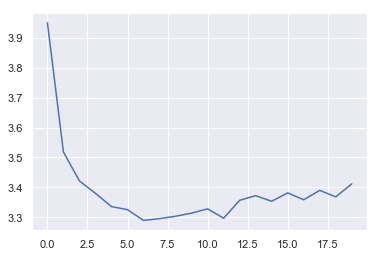

In [299]:
import matplotlib.pyplot as plt
plt.plot(mae_list)

**Find the optimal k value**

In [300]:
print("The optimal K is ", min_k)

The optimal K is  7


In [301]:
def recommend(dataMat, user, k, similarity_matrix, N=5, estMethod=itemB_test):
    unratedItems = np.nonzero(dataMat[user, :].A == 0)[1]  # find unrated items
    if len(unratedItems) == 0: return 'you rated everything'
    itemScores = []
    
    for item in unratedItems:
        estimatedScore = estMethod(dataMat, user, item, k, similarity_matrix)
        itemScores.append((item, estimatedScore))
    
    return sorted(itemScores, key=lambda jj: jj[1], reverse=True)[:N]

**Recommendations for anecdotal users**

In [302]:
recommendationForUser40 = recommend(np.mat(jester), 40, min_k, similarity_matrix, N=5)
if recommendationForUser40 == "you rated everything":
    print(recommendationForUser40)
else:
    print("*****Below is the top 5 recommendations*****")
    print('\n')
    for rating in recommendationForUser40:
        index = rating[0]
        joke = jokes.iloc[index][1]
        print("Joke : ", joke)
        print("Predicted Rating :", rating[1])
        print('\n')

*****Below is the top 5 recommendations*****


Joke :  Q: What is the difference between George  Washington Richard Nixon and Bill Clinton? A: Washington couldn't tell a lie Nixon couldn't   tell the truth andClinton doesn't know the difference.
Predicted Rating : 9.163010760979269


Joke :  At a recent Sacramento PC Users Group meeting a company was demonstrating its latest speech-recognition software.   A representative from the company was just about ready to start the demonstration and asked everyone in the room to quiet down.Just then someone in the back of the room yelled"Format C: Return."Someone else chimed in:"Yes Return"Unfortunately the software worked.
Predicted Rating : 8.570064850646423


Joke :  Q: Ever wonder why the IRS calls it Form 1040?A: Because for every $50 that you earn you get 10 and they get 40.
Predicted Rating : 8.137317975713875


Joke :  If pro- is the opposite of con- then congress must be the opposite of progress.
Predicted Rating : 8.103908794416927


J

In [303]:
recommendationForUser45 = recommend(np.mat(jester), 45, min_k, similarity_matrix, N=5)
if recommendationForUser45 == "you rated everything":
    print(recommendationForUser45)
else:
    print("*****Below is the top 5 recommendations*****")
    print('\n')
    for rating in recommendationForUser45:
        index = rating[0]
        joke = jokes.iloc[index][1]
        print("Joke : ", joke)
        print("Predicted Rating :", rating[1])
        print('\n')

*****Below is the top 5 recommendations*****


Joke :  Q: What's the difference between the government  and  the Mafia? A: One of them is organized.
Predicted Rating : 12.655068954195213


Joke :  On the first day of college the Dean addressed the students pointing out some of the rules:"The female dormitory will be out-of-bounds for all male students and the male dormitory to the female students. Anybody caught breaking this rule will be fined $20 the first time." He continued "Anybody caught breaking this rule the second time will be fined $60. Being caught a third time will cost you a fine of $180. Are there any questions ?"At this point a male student in the crowd inquired:"How much for a season pass ?"
Predicted Rating : 12.577154297744961


Joke :  There once was a man and a woman that both  got in  a terrible car wreck. Both of their vehicles  were completely destroyed buy fortunately no one  was   hurt.  In thankfulness the woman said to the man 'We are both okay so we should c

In [304]:
recommendationForUser3 = recommend(np.mat(jester), 3, min_k, similarity_matrix, N=5)
if recommendationForUser3 == "you rated everything":
    print(recommendationForUser3)
else:
    print("*****Below is the top 5 recommendations*****")
    print('\n')
    for rating in recommendationForUser3:
        index = rating[0]
        joke = jokes.iloc[index][1]
        print("Joke : ", joke)
        print("Predicted Rating :", rating[1])
        print('\n')

*****Below is the top 5 recommendations*****


Joke :  Q. What's the difference between a man and a toilet? A. A toilet doesn't follow you around after you use it.
Predicted Rating : 18.580661810486173


Joke :  Employer to applicant: "In this job we need someone who is responsible."Applicant: "I'm the one you want. On my last job every time anything went wrong they said I was responsible."
Predicted Rating : 18.413871384938346


Joke :  A Jewish young man was seeing a psychiatrist for an eating and sleeping disorder. "I am so obsessed with my mother... As soon as I go to sleep I start dreaming and everyone in my dream turns into my mother. I wake up in such a state all I can do is go downstairs and eat a piece of toast."The psychiatrist replies:"What just one piece of toast for a big boy like you?"
Predicted Rating : 17.89740213372124


Joke :  Two kindergarten girls were talking outside: one said "You won't believe what I saw on the patio yesterday--a condom!"The second girl asked "W